# Proyek Analisis Data: Bike Sharing Dataset
- **Nama:** Prayoga Agus Setiawan
- **Email:** prayogaagussetiawan1@gmail.com
- **ID Dicoding:** prayoga_agussetiawan

## Menentukan Pertanyaan Bisnis

- Bagaimana performa penyewaan sepeda dalam beberapa tahun belakangan?
- Bagaimana pola penyewaan sepeda berdasarkan waktu (musim, hari kerja, cuaca dan jam)?
- Seberapa besar pengaruh kondisi cuaca (suhu, kelembapan, kecepatan angin) terhadap penyewaan sepeda?
- Apakah ada tren peningkatan jumlah registered users dibandingkan dengan casual user selama periode tertentu?
- Bagaimana pola penyewaan sepeda berdasarkan seberapa sering pengguna terdaftar melakukan penyewaan, waktu terakhir mereka menyewa, dan kontribusi nilai sewa?

## Import Semua Packages/Library yang Digunakan

In [45]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

## Data Wrangling

### Gathering Data

In [46]:
# Menampilkan dataset
day_df = pd.read_csv("data\day.csv")
day_df.head()

,instant,dteday,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
0,1,2011-01-01,1,0,1,0,6,0,2,0.344167,0.363625,0.805833,0.160446,331,654,985
1,2,2011-01-02,1,0,1,0,0,0,2,0.363478,0.353739,0.696087,0.248539,131,670,801
2,3,2011-01-03,1,0,1,0,1,1,1,0.196364,0.189405,0.437273,0.248309,120,1229,1349
3,4,2011-01-04,1,0,1,0,2,1,1,0.200000,0.212122,0.590435,0.160296,108,1454,1562
4,5,2011-01-05,1,0,1,0,3,1,1,0.226957,0.229270,0.436957,0.186900,82,1518,1600


In [47]:
# Menampilkan dataset hour_df
hour_df = pd.read_csv("data\hour.csv")
hour_df.head()

,instant,dteday,season,yr,mnth,hr,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
0,1,2011-01-01,1,0,1,0,0,6,0,1,0.24,0.2879,0.81,0.0,3,13,16
1,2,2011-01-01,1,0,1,1,0,6,0,1,0.22,0.2727,0.80,0.0,8,32,40
2,3,2011-01-01,1,0,1,2,0,6,0,1,0.22,0.2727,0.80,0.0,5,27,32
3,4,2011-01-01,1,0,1,3,0,6,0,1,0.24,0.2879,0.75,0.0,3,10,13
4,5,2011-01-01,1,0,1,4,0,6,0,1,0.24,0.2879,0.75,0.0,0,1,1


**Insight:**
- Kedua data memiliki struktur field yang sama keculai field hr pada data hour_df
- dteday dapat menjadi penghubung antara data harian dan per jam, memungkinkan analisis agregasi waktu
- Field season, yr, mnth, weekday, holiday, workingday dapat menjadi tolak ukur yang konsisten
- Field temp, atemp, hum, windspeed dapat digunakan untuk mewakili kondisi lingkungan yang memengaruhi penggunaan sepeda
- Field casual, registered, cnt data penyewaan yang dapat dibandingkan antar hari atau jam untuk yang terdaftar ataupun tidak terdaftar

### Assessing Data

#### Menilai tabel `day_df`

In [48]:
day_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 731 entries, 0 to 730
Data columns (total 16 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   instant     731 non-null    int64  
 1   dteday      731 non-null    object 
 2   season      731 non-null    int64  
 3   yr          731 non-null    int64  
 4   mnth        731 non-null    int64  
 5   holiday     731 non-null    int64  
 6   weekday     731 non-null    int64  
 7   workingday  731 non-null    int64  
 8   weathersit  731 non-null    int64  
 9   temp        731 non-null    float64
 10  atemp       731 non-null    float64
 11  hum         731 non-null    float64
 12  windspeed   731 non-null    float64
 13  casual      731 non-null    int64  
 14  registered  731 non-null    int64  
 15  cnt         731 non-null    int64  
dtypes: float64(4), int64(11), object(1)
memory usage: 91.5+ KB


In [49]:
day_df.isna().sum()

instant       0
dteday        0
season        0
yr            0
mnth          0
holiday       0
weekday       0
workingday    0
weathersit    0
temp          0
atemp         0
hum           0
windspeed     0
casual        0
registered    0
cnt           0
dtype: int64

In [50]:
print("Jumlah duplikasi: ", day_df.duplicated().sum())

Jumlah duplikasi:  0


In [51]:
day_df.describe()

,instant,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
count,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000
mean,366.000000,2.496580,0.500684,6.519836,0.028728,2.997264,0.683995,1.395349,0.495385,0.474354,0.627894,0.190486,848.176471,3656.172367,4504.348837
std,211.165812,1.110807,0.500342,3.451913,0.167155,2.004787,0.465233,0.544894,0.183051,0.162961,0.142429,0.077498,686.622488,1560.256377,1937.211452
min,1.000000,1.000000,0.000000,1.000000,0.000000,0.000000,0.000000,1.000000,0.059130,0.079070,0.000000,0.022392,2.000000,20.000000,22.000000
25%,183.500000,2.000000,0.000000,4.000000,0.000000,1.000000,0.000000,1.000000,0.337083,0.337842,0.520000,0.134950,315.500000,2497.000000,3152.000000
50%,366.000000,3.000000,1.000000,7.000000,0.000000,3.000000,1.000000,1.000000,0.498333,0.486733,0.626667,0.180975,713.000000,3662.000000,4548.000000
75%,548.500000,3.000000,1.000000,10.000000,0.000000,5.000000,1.000000,2.000000,0.655417,0.608602,0.730209,0.233214,1096.000000,4776.500000,5956.000000
max,731.000000,4.000000,1.000000,12.000000,1.000000,6.000000,1.000000,3.000000,0.861667,0.840896,0.972500,0.507463,3410.000000,6946.000000,8714.000000


#### Menilai tabel `hour_df`

In [52]:
hour_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 17379 entries, 0 to 17378
Data columns (total 17 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   instant     17379 non-null  int64  
 1   dteday      17379 non-null  object 
 2   season      17379 non-null  int64  
 3   yr          17379 non-null  int64  
 4   mnth        17379 non-null  int64  
 5   hr          17379 non-null  int64  
 6   holiday     17379 non-null  int64  
 7   weekday     17379 non-null  int64  
 8   workingday  17379 non-null  int64  
 9   weathersit  17379 non-null  int64  
 10  temp        17379 non-null  float64
 11  atemp       17379 non-null  float64
 12  hum         17379 non-null  float64
 13  windspeed   17379 non-null  float64
 14  casual      17379 non-null  int64  
 15  registered  17379 non-null  int64  
 16  cnt         17379 non-null  int64  
dtypes: float64(4), int64(12), object(1)
memory usage: 2.3+ MB


In [53]:
hour_df.isna().sum()

instant       0
dteday        0
season        0
yr            0
mnth          0
hr            0
holiday       0
weekday       0
workingday    0
weathersit    0
temp          0
atemp         0
hum           0
windspeed     0
casual        0
registered    0
cnt           0
dtype: int64

In [54]:
print("Jumlah duplikasi: ", hour_df.duplicated().sum())

Jumlah duplikasi:  0


In [55]:
hour_df.describe()

,instant,season,yr,mnth,hr,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
count,17379.0000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000
mean,8690.0000,2.501640,0.502561,6.537775,11.546752,0.028770,3.003683,0.682721,1.425283,0.496987,0.475775,0.627229,0.190098,35.676218,153.786869,189.463088
std,5017.0295,1.106918,0.500008,3.438776,6.914405,0.167165,2.005771,0.465431,0.639357,0.192556,0.171850,0.192930,0.122340,49.305030,151.357286,181.387599
min,1.0000,1.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.020000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000
25%,4345.5000,2.000000,0.000000,4.000000,6.000000,0.000000,1.000000,0.000000,1.000000,0.340000,0.333300,0.480000,0.104500,4.000000,34.000000,40.000000
50%,8690.0000,3.000000,1.000000,7.000000,12.000000,0.000000,3.000000,1.000000,1.000000,0.500000,0.484800,0.630000,0.194000,17.000000,115.000000,142.000000
75%,13034.5000,3.000000,1.000000,10.000000,18.000000,0.000000,5.000000,1.000000,2.000000,0.660000,0.621200,0.780000,0.253700,48.000000,220.000000,281.000000
max,17379.0000,4.000000,1.000000,12.000000,23.000000,1.000000,6.000000,1.000000,4.000000,1.000000,1.000000,1.000000,0.850700,367.000000,886.000000,977.000000


**Insight:**
- Tipe data pada kedua data sudah sesuai kecuali untuk dteday
- Tidak ada data yang terduplikasi
- Tidak ada missing value
- Tidak ada data yang inaccurate

### Cleaning Data

#### Membersihkan data `day_df`

##### Memperbaiki tipe data

In [56]:
day_df["dteday"] = pd.to_datetime(day_df["dteday"])

In [57]:
day_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 731 entries, 0 to 730
Data columns (total 16 columns):
 #   Column      Non-Null Count  Dtype         
---  ------      --------------  -----         
 0   instant     731 non-null    int64         
 1   dteday      731 non-null    datetime64[ns]
 2   season      731 non-null    int64         
 3   yr          731 non-null    int64         
 4   mnth        731 non-null    int64         
 5   holiday     731 non-null    int64         
 6   weekday     731 non-null    int64         
 7   workingday  731 non-null    int64         
 8   weathersit  731 non-null    int64         
 9   temp        731 non-null    float64       
 10  atemp       731 non-null    float64       
 11  hum         731 non-null    float64       
 12  windspeed   731 non-null    float64       
 13  casual      731 non-null    int64         
 14  registered  731 non-null    int64         
 15  cnt         731 non-null    int64         
dtypes: datetime64[ns](1), floa

##### Menghapus field yang tidak diperlukan `instant`, `holiday`secara tidak langsung direpresentasikan `workingday`

In [58]:
# Mwnghapus fiels instant dan holiday
columns = ["instant", "holiday"]
day_df.drop(columns=columns, inplace=True)

# Memeriksa entry tabel
day_df.head()

,dteday,season,yr,mnth,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
0,2011-01-01,1,0,1,6,0,2,0.344167,0.363625,0.805833,0.160446,331,654,985
1,2011-01-02,1,0,1,0,0,2,0.363478,0.353739,0.696087,0.248539,131,670,801
2,2011-01-03,1,0,1,1,1,1,0.196364,0.189405,0.437273,0.248309,120,1229,1349
3,2011-01-04,1,0,1,2,1,1,0.200000,0.212122,0.590435,0.160296,108,1454,1562
4,2011-01-05,1,0,1,3,1,1,0.226957,0.229270,0.436957,0.186900,82,1518,1600


##### Denormalisasi kolom `temp`, `atemp`, `hum`, dan `windspeed`

In [59]:
# Denormalisasi data yang dinormalisasi
day_df['temp'] = day_df['temp'] * (39 - (-8)) + (-8)
day_df['atemp'] = day_df['atemp'] * (50 - (-16)) + (-16)
day_df['hum'] = day_df['hum'] * 100
day_df['windspeed'] = day_df['windspeed'] * 67

# memeriksa entry tabel
day_df.head()

,dteday,season,yr,mnth,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
0,2011-01-01,1,0,1,6,0,2,8.175849,7.999250,80.5833,10.749882,331,654,985
1,2011-01-02,1,0,1,0,0,2,9.083466,7.346774,69.6087,16.652113,131,670,801
2,2011-01-03,1,0,1,1,1,1,1.229108,-3.499270,43.7273,16.636703,120,1229,1349
3,2011-01-04,1,0,1,2,1,1,1.400000,-1.999948,59.0435,10.739832,108,1454,1562
4,2011-01-05,1,0,1,3,1,1,2.666979,-0.868180,43.6957,12.522300,82,1518,1600


##### Kategorikan tahun `yr`

In [60]:
# Mengkategorikan tahun 0:2011, 1:2012 agar lebih mudah diinterpretasikan
day_df.yr.replace((0,1), (2011,2012), inplace=True)

# Memeriksa entry tabel
day_df.head()

C:\Users\USER\AppData\Local\Temp\ipykernel_9756\503018662.py:2: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  day_df.yr.replace((0,1), (2011,2012), inplace=True)


,dteday,season,yr,mnth,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
0,2011-01-01,1,2011,1,6,0,2,8.175849,7.999250,80.5833,10.749882,331,654,985
1,2011-01-02,1,2011,1,0,0,2,9.083466,7.346774,69.6087,16.652113,131,670,801
2,2011-01-03,1,2011,1,1,1,1,1.229108,-3.499270,43.7273,16.636703,120,1229,1349
3,2011-01-04,1,2011,1,2,1,1,1.400000,-1.999948,59.0435,10.739832,108,1454,1562
4,2011-01-05,1,2011,1,3,1,1,2.666979,-0.868180,43.6957,12.522300,82,1518,1600


**Insight:**
- Mengubah tipe data dtetime menjadi datetime
- Menghapus field yang tidak diperlukan `holiday`dan `instant`
- Denormalisasi field yang telah dinormalisasi kedalam ukuran sebenarnya
- Memperjelas kategori year kedalam tahun sebenarnya

#### Membersihkan data `hour_df`

##### Memperbaiki tipe data

In [61]:
hour_df["dteday"] = pd.to_datetime(day_df["dteday"])

In [62]:
hour_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 17379 entries, 0 to 17378
Data columns (total 17 columns):
 #   Column      Non-Null Count  Dtype         
---  ------      --------------  -----         
 0   instant     17379 non-null  int64         
 1   dteday      731 non-null    datetime64[ns]
 2   season      17379 non-null  int64         
 3   yr          17379 non-null  int64         
 4   mnth        17379 non-null  int64         
 5   hr          17379 non-null  int64         
 6   holiday     17379 non-null  int64         
 7   weekday     17379 non-null  int64         
 8   workingday  17379 non-null  int64         
 9   weathersit  17379 non-null  int64         
 10  temp        17379 non-null  float64       
 11  atemp       17379 non-null  float64       
 12  hum         17379 non-null  float64       
 13  windspeed   17379 non-null  float64       
 14  casual      17379 non-null  int64         
 15  registered  17379 non-null  int64         
 16  cnt         17379 non-

##### Menghapus field yang tidak diperlukan `instant`, `holiday`secara tidak langsung direpresentasikan `workingday`

In [63]:
# Mwnghapus fiels instant dan holiday
columns = ["instant", "holiday"]
hour_df.drop(columns=columns, inplace=True)

# Memeriksa entry tabel
hour_df.head()

,dteday,season,yr,mnth,hr,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
0,2011-01-01,1,0,1,0,6,0,1,0.24,0.2879,0.81,0.0,3,13,16
1,2011-01-02,1,0,1,1,6,0,1,0.22,0.2727,0.80,0.0,8,32,40
2,2011-01-03,1,0,1,2,6,0,1,0.22,0.2727,0.80,0.0,5,27,32
3,2011-01-04,1,0,1,3,6,0,1,0.24,0.2879,0.75,0.0,3,10,13
4,2011-01-05,1,0,1,4,6,0,1,0.24,0.2879,0.75,0.0,0,1,1


##### Denormalisasi kolom `temp`, `atemp`, `hum`, dan `windspeed`

In [64]:
# Denormalisasi data yang dinormalisasi
hour_df['temp'] = hour_df['temp'] * (39 - (-8)) + (-8)
hour_df['atemp'] = hour_df['atemp'] * (50 - (-16)) + (-16)
hour_df['hum'] = hour_df['hum'] * 100
hour_df['windspeed'] = hour_df['windspeed'] * 67

# memeriksa entry tabel
hour_df.head()

,dteday,season,yr,mnth,hr,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
0,2011-01-01,1,0,1,0,6,0,1,3.28,3.0014,81.0,0.0,3,13,16
1,2011-01-02,1,0,1,1,6,0,1,2.34,1.9982,80.0,0.0,8,32,40
2,2011-01-03,1,0,1,2,6,0,1,2.34,1.9982,80.0,0.0,5,27,32
3,2011-01-04,1,0,1,3,6,0,1,3.28,3.0014,75.0,0.0,3,10,13
4,2011-01-05,1,0,1,4,6,0,1,3.28,3.0014,75.0,0.0,0,1,1


##### Kategorikan tahun `yr`

In [65]:
# Mengkategorikan tahun 0:2011, 1:2012 agar lebih mudah diinterpretasikan
hour_df.yr.replace((0,1), (2011,2012), inplace=True)

# Memeriksa entry tabel
hour_df.head()

C:\Users\USER\AppData\Local\Temp\ipykernel_9756\264939950.py:2: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  hour_df.yr.replace((0,1), (2011,2012), inplace=True)


,dteday,season,yr,mnth,hr,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
0,2011-01-01,1,2011,1,0,6,0,1,3.28,3.0014,81.0,0.0,3,13,16
1,2011-01-02,1,2011,1,1,6,0,1,2.34,1.9982,80.0,0.0,8,32,40
2,2011-01-03,1,2011,1,2,6,0,1,2.34,1.9982,80.0,0.0,5,27,32
3,2011-01-04,1,2011,1,3,6,0,1,3.28,3.0014,75.0,0.0,3,10,13
4,2011-01-05,1,2011,1,4,6,0,1,3.28,3.0014,75.0,0.0,0,1,1


**Insight:**
- Mengubah tipe data dtetime menjadi datetime
- Menghapus field yang tidak diperlukan `holiday`dan `instant`
- Denormalisasi field yang telah dinormalisasi kedalam ukuran sebenarnya
- Memperjelas kategori year kedalam tahun sebenarnya

## Exploratory Data Analysis (EDA)

### Explore data `day_df`

In [66]:
# Melihat sample data
day_df.sample(5)

,dteday,season,yr,mnth,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
443,2012-03-19,1,2012,3,1,1,1,17.615000,19.166186,72.8750,10.875239,982,5171,6153
128,2011-05-09,2,2011,5,1,1,1,17.027500,18.666236,58.8750,11.792000,664,3698,4362
112,2011-04-23,2,2011,4,6,0,2,13.620000,13.707986,88.7917,15.458575,1462,2574,4036
664,2012-10-26,4,2012,10,5,1,2,17.654151,18.501500,80.7083,8.875289,1182,6262,7444
406,2012-02-11,1,2012,2,6,0,3,2.535849,-2.082778,73.1250,19.416332,192,1977,2169


In [67]:
# melihat seluruh describe data
day_df.describe(include='all')

,dteday,season,yr,mnth,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
count,731,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000
mean,2012-01-01 00:00:00,2.496580,2011.500684,6.519836,2.997264,0.683995,1.395349,15.283085,15.307363,62.789406,12.762576,848.176471,3656.172367,4504.348837
min,2011-01-01 00:00:00,1.000000,2011.000000,1.000000,0.000000,0.000000,1.000000,-5.220871,-10.781406,0.000000,1.500244,2.000000,20.000000,22.000000
25%,2011-07-02 12:00:00,2.000000,2011.000000,4.000000,1.000000,0.000000,1.000000,7.842925,6.297605,52.000000,9.041650,315.500000,2497.000000,3152.000000
50%,2012-01-01 00:00:00,3.000000,2012.000000,7.000000,3.000000,1.000000,1.000000,15.421651,16.124378,62.666700,12.125325,713.000000,3662.000000,4548.000000
75%,2012-07-01 12:00:00,3.000000,2012.000000,10.000000,5.000000,1.000000,2.000000,22.804575,24.167732,73.020850,15.625371,1096.000000,4776.500000,5956.000000
max,2012-12-31 00:00:00,4.000000,2012.000000,12.000000,6.000000,1.000000,3.000000,32.498349,39.499136,97.250000,34.000021,3410.000000,6946.000000,8714.000000
std,NaN,1.110807,0.500342,3.451913,2.004787,0.465233,0.544894,8.603397,10.755438,14.242910,5.192357,686.622488,1560.256377,1937.211452


**Insight:**
- Jika melihat data diatas dapat kita temukan count range yang sangat jauh pada minimal penyewaan sepeda perhari terhadap rata-ratanya

In [68]:
# Mencari tahu entry denan jumlah penyewaan terendah
filtered_df = day_df[day_df["cnt"] == 22]

# print entry
print(filtered_df)

        dteday  season    yr  mnth  weekday  workingday  weathersit   temp  \
667 2012-10-29       4  2012    10        1           1           3  12.68   

       atemp   hum  windspeed  casual  registered  cnt  
667  13.0004  88.0    23.9994       2          20   22  


**Insight:**
- Jumlah penyewaan terendah terjadi pada hari Senin, 29 Oktober 2012 dengan cuaca sedikit bersalju temp 12.68 °C dan hum 88

In [69]:
# Menghitung korelasi antara temp dan atemp
correlation = day_df[['temp', 'atemp']].corr()
print(correlation)

           temp     atemp
temp   1.000000  0.991702
atemp  0.991702  1.000000


**Insight:**
- Analisis correlation menunjukkan angka mendekati 1 sehingga memiliki hubungan yang kuat
- Analis dapat memilih salah satu parameter untuk menilai suhu

In [70]:
# Mengkategorikan hari workday dan weekend
day_df.workingday.replace({0: 'weekend', 1: 'workday'}, inplace=True)

# Melihat pola penyewaan sepeda pada workdays dan weekend
byworkingday_df = day_df.groupby(by="workingday").agg({
    "dteday" : "nunique",
    "cnt" : ["sum", "min", "max", "mean", "std"]
}).sort_values(by=("cnt", "sum"), ascending=False)
byworkingday_df

C:\Users\USER\AppData\Local\Temp\ipykernel_9756\913227567.py:2: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  day_df.workingday.replace({0: 'weekend', 1: 'workday'}, inplace=True)


dteday      cnt                                     
           nunique      sum  min   max         mean          std
workingday                                                      
workday        500  2292410   22  8362  4584.820000  1878.415583
weekend        231  1000269  605  8714  4330.168831  2052.141245

**Insight:**
- Jumlah penyewaan terbanyak berada pada hari workday dengan jumlah 2.292.410 unit namun memiliki min penyewaan 22
- Walaupun jumlah dan rata-rata pnyewaan terbanyak ada pada workdaya, namun untuk maksimal dari penyewaan terdapat pada weekend

In [71]:
# Mengkategorikan musim penywaan sepeda
day_df.season.replace({1: 'springer', 2: 'summer', 3: 'fall', 4: 'winter'}, inplace=True)

# Melihat pola penyewaan sepeda berdasarkan musimyang sedang terjadi
byseason_df = day_df.groupby(by="season").agg({
    "dteday" : "nunique",
    "cnt" : ["sum", "min", "max", "mean"]
}).sort_values(by=("cnt", "sum"), ascending=False) 

byseason_df

C:\Users\USER\AppData\Local\Temp\ipykernel_9756\1469023771.py:2: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  day_df.season.replace({1: 'springer', 2: 'summer', 3: 'fall', 4: 'winter'}, inplace=True)


dteday      cnt                         
         nunique      sum   min   max         mean
season                                            
fall         188  1061129  1115  8714  5644.303191
summer       184   918589   795  8362  4992.331522
winter       178   841613    22  8555  4728.162921
springer     181   471348   431  7836  2604.132597

**Insight:**
- Penyewaaan sepeda terbanyak ada pada musim fall dengan jumlah 1.061.129

In [72]:
# Kategorikan cuaca yang terjadi pada masa penyewaan sepeda
day_df.weathersit.replace({1: 'clear', 2: 'mist_cloudy', 3: 'light_snow', 4: 'heavy_rain'}, inplace=True)

# Melihat pola penyewaan sepeda berdasarkan cuaca yang terjadi
byweather_df = day_df.groupby(by="weathersit").agg({
    "dteday" : "nunique",
    "cnt" : ["sum", "min", 'max', "mean"]
}).sort_values(by=("cnt", "sum"), ascending=False)
byweather_df

C:\Users\USER\AppData\Local\Temp\ipykernel_9756\299608202.py:2: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  day_df.weathersit.replace({1: 'clear', 2: 'mist_cloudy', 3: 'light_snow', 4: 'heavy_rain'}, inplace=True)


dteday      cnt                        
            nunique      sum  min   max         mean
weathersit                                          
clear           463  2257952  431  8714  4876.786177
mist_cloudy     247   996858  605  8362  4035.862348
light_snow       21    37869   22  4639  1803.285714

**Insight:**
- Dapat kita lihat bahwa penyewaan sepeda terbanyak saat cuaca sedang cerah
- Tidak pernah terjadi penyewaan sepeda saat cuaca sedang hujan ringan

In [73]:
# Melihat tren penyewaan antara casual user dan registered user perbulan
type_user_month_df = day_df.groupby(by="mnth").agg({
    "mnth" : "nunique",
    "casual" : "sum",
    "registered" : "sum",
    "cnt" : "sum"
})
type_user_month_df

,mnth,casual,registered,cnt
mnth,,,,
1,1,12042,122891,134933
2,1,14963,136389,151352
3,1,44444,184476,228920
4,1,60802,208292,269094
5,1,75285,256401,331686
6,1,73906,272436,346342
7,1,78157,266791,344948
8,1,72039,279155,351194
9,1,70323,275668,345991


**Insight:**
- Casual user paling banyak melakukan penyewaan pada bulan 7 sebanyak 78.157
- Registered user melakukan penyewaaan paling banyak pada bulan 8 sebanyak 279.155

### Explore tabel `hour_df`

In [74]:
# Melihat sample hour_df
hour_df.sample(5)

,dteday,season,yr,mnth,hr,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
12044,NaT,2,2012,5,1,2,1,2,19.26,20.0030,83.0,8.9981,11,16,27
6154,NaT,3,2011,9,0,1,1,2,16.44,17.0000,72.0,11.0014,14,23,37
805,NaT,1,2011,2,0,0,0,1,4.22,1.0016,70.0,12.9980,2,37,39
6142,NaT,3,2011,9,12,0,0,1,17.38,18.0032,64.0,8.9981,135,229,364
8394,NaT,1,2011,12,10,3,1,2,14.56,15.0002,82.0,27.9993,6,83,89


In [75]:
# Melihat describe datri data hour_df
hour_df.describe()

,dteday,season,yr,mnth,hr,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
count,731,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000
mean,2012-01-01 00:00:00,2.501640,2011.502561,6.537775,11.546752,3.003683,0.682721,1.425283,15.358397,15.401157,62.722884,12.736540,35.676218,153.786869,189.463088
min,2011-01-01 00:00:00,1.000000,2011.000000,1.000000,0.000000,0.000000,0.000000,1.000000,-7.060000,-16.000000,0.000000,0.000000,0.000000,0.000000,1.000000
25%,2011-07-02 12:00:00,2.000000,2011.000000,4.000000,6.000000,1.000000,0.000000,1.000000,7.980000,5.997800,48.000000,7.001500,4.000000,34.000000,40.000000
50%,2012-01-01 00:00:00,3.000000,2012.000000,7.000000,12.000000,3.000000,1.000000,1.000000,15.500000,15.996800,63.000000,12.998000,17.000000,115.000000,142.000000
75%,2012-07-01 12:00:00,3.000000,2012.000000,10.000000,18.000000,5.000000,1.000000,2.000000,23.020000,24.999200,78.000000,16.997900,48.000000,220.000000,281.000000
max,2012-12-31 00:00:00,4.000000,2012.000000,12.000000,23.000000,6.000000,1.000000,4.000000,39.000000,50.000000,100.000000,56.996900,367.000000,886.000000,977.000000
std,NaN,1.106918,0.500008,3.438776,6.914405,2.005771,0.465431,0.639357,9.050138,11.342114,19.292983,8.196795,49.305030,151.357286,181.387599


In [76]:
# Melihat pola penyewaan sepeda berdasarkan jam
byhour_df = hour_df.groupby(by="hr").agg({
    "hr" : "nunique",
    "cnt" : ["sum", "min", "max", "mean"]
}).sort_values(by=("cnt", "sum"), ascending=False)
byhour_df

hr     cnt                     
   nunique     sum min  max        mean
hr                                     
17       1  336860  15  976  461.452055
18       1  309772  23  977  425.510989
8        1  261001   5  839  359.011004
16       1  227748  11  783  311.983562
19       1  226789  11  743  311.523352
13       1  184919  11  760  253.661180
12       1  184414   3  776  253.315934
15       1  183149   7  750  251.233196
14       1  175652  12  750  240.949246
20       1  164550  11  567  226.030220
9        1  159438  14  426  219.309491
7        1  154171   1  596  212.064649
11       1  151320  10  663  208.143054
10       1  126257   8  539  173.668501
21       1  125445   6  584  172.314560
22       1   95612   9  502  131.335165
23       1   63941   2  256   87.831044
6        1   55132   1  213   76.044138
0        1   39130   2  283   53.898072
1        1   24164   1  168   33.375691
2        1   16352   1  132   22.869930
5        1   14261   1   66   19.889819
3        1    8174   1   79   11.727403
4        1    4428   1   28    6.352941

**Insight:**
- jika melihat data tersebut kita dapat simpulkan penyewaan terbanyak terjadi pada waktu sore hari terlebih pada jam 17-18
- Waktu peminjaman kedua terbanyak adalah pagi hari pada jam 8

In [77]:
# Melihat pengaru kondisi cuaca seperti `temp`, `hum`, dan `windspeed` menggunakan correlation matrix
correlation_matrix = hour_df[["temp", "hum", "windspeed", "cnt"]].corr()
print(correlation_matrix)

               temp       hum  windspeed       cnt
temp       1.000000 -0.069881  -0.023125  0.404772
hum       -0.069881  1.000000  -0.290105 -0.322911
windspeed -0.023125 -0.290105   1.000000  0.093234
cnt        0.404772 -0.322911   0.093234  1.000000


**Insight:**
- Berdasarkan hasil tersebut temp memiliki korelasi namun tidak signifikan sebesar 0,40
- Sedangkan hum memiliki korelasi negatif sebesar 0,32
- Untuk Windspeed dapat dikatakan tidakmemiliki korelasi karena bernilai 0,09

## Visualization & Explanatory Analysis

### Pertanyaan 1: Bagaimana performa penyewaan sepeda dalam beberapa tahun belakangan?

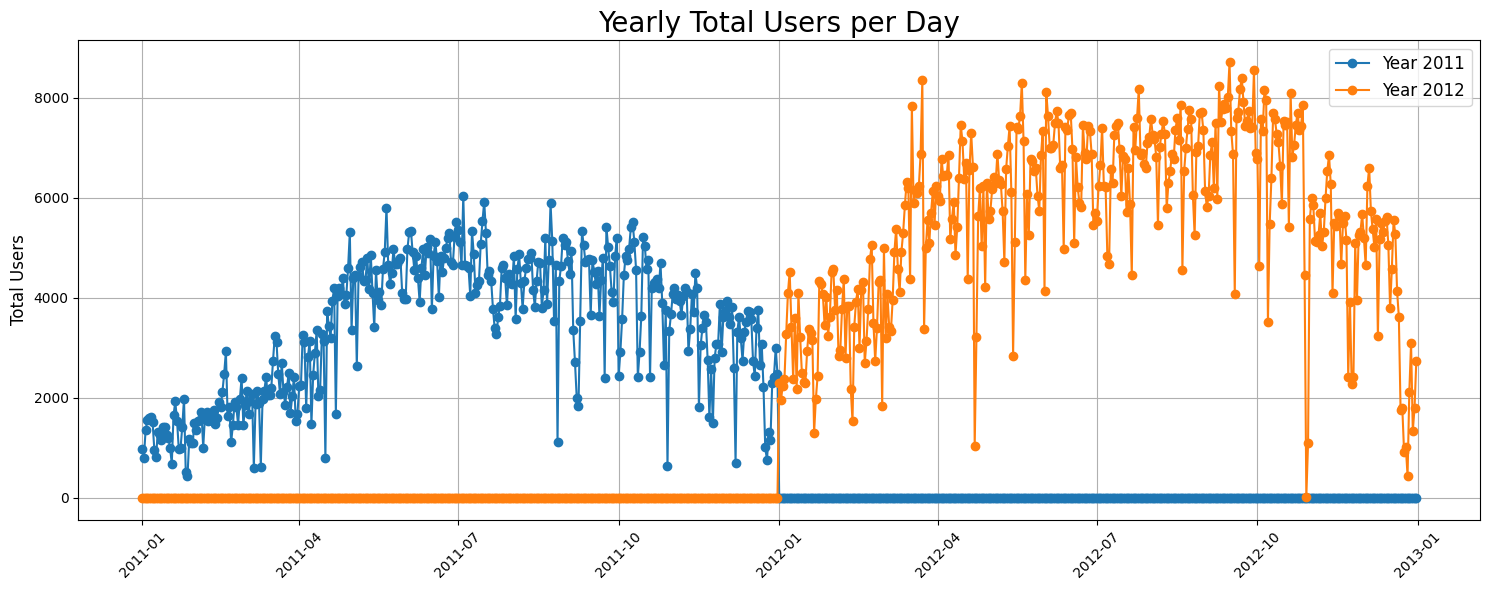

In [78]:
# Mengelompokkan data berdasarkan 'dteday' dan 'yr' dan menjumlahkan kolom 'cnt'
df_grouped = day_df.groupby(['dteday', 'yr'])['cnt'].sum().unstack(fill_value=0)

# Membuat figure untuk grafik
plt.figure(figsize=(15, 6))

# Plot data untuk setiap tahun
for year in df_grouped.columns:
    plt.plot(df_grouped.index, df_grouped[year], label=f"Year {year}", marker='o', linestyle='-')

# Menambahkan judul, label sumbu, dan legend
plt.title("Yearly Total Users per Day", loc="center", fontsize=20)
plt.ylabel("Total Users", fontsize=12)
plt.xticks(rotation=45)  # Rotasi untuk memperjelas label tanggal
plt.legend(fontsize=12)
plt.grid(True)

# Menampilkan grafik
plt.tight_layout()
plt.show()

**Insight:**
- Penyewaan overall mengalami peningkatan dari tahun 2011 ke 2012 
- Namun pada 2012 akhir penyewaan menalami penurunan walaupun pola ini serupa pada tahun sebelumnya namun harus menjadi perhatian agar bisa meniningkat 

### Pertanyaan 2: Bagaimana pola penyewaan sepeda berdasarkan waktu (musim, cuaca, hari kerja dan jam)?

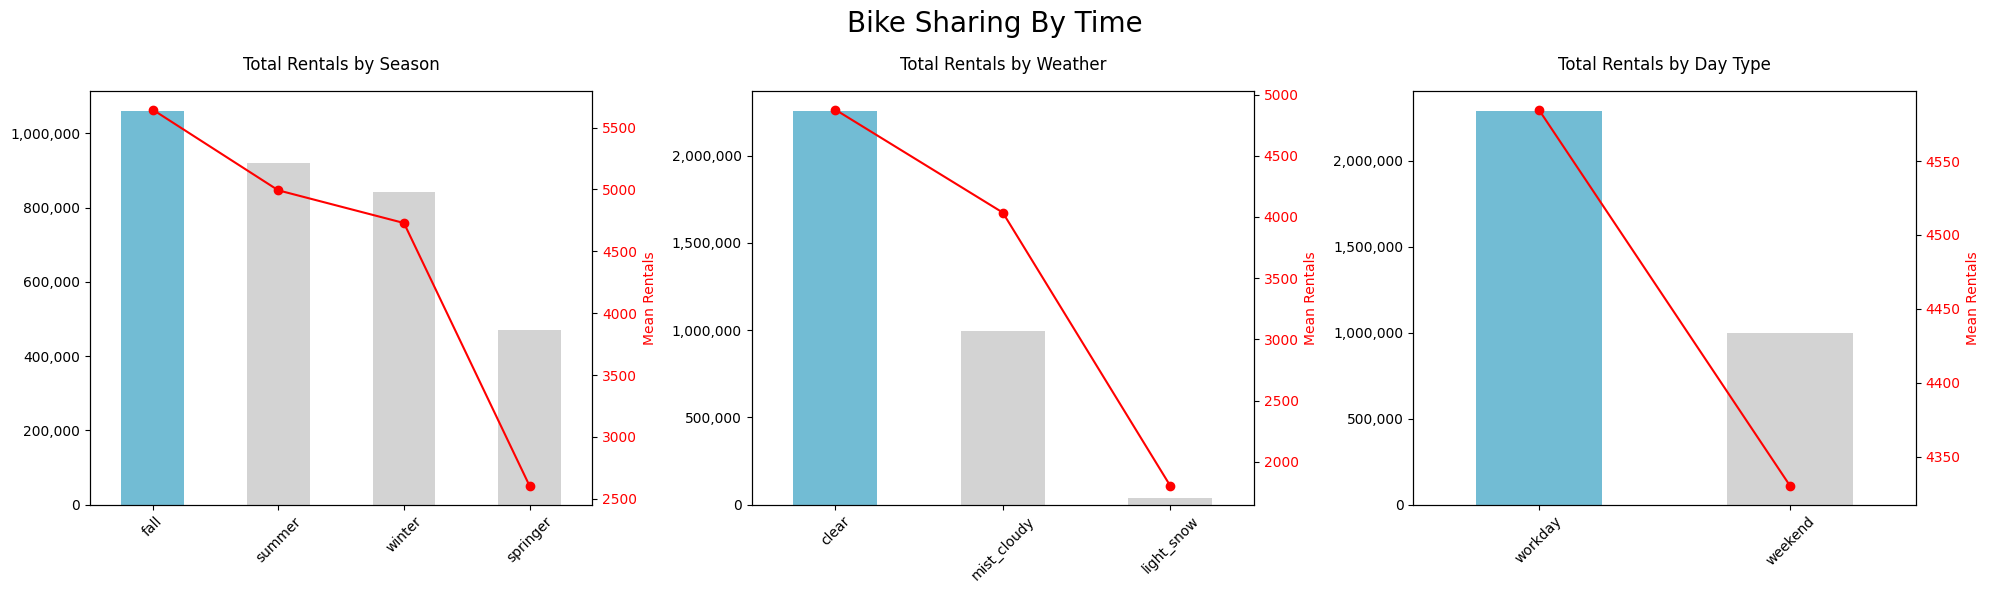

In [79]:
# Membuat figure untuk grafik
fig, (ax1, ax2, ax3) = plt.subplots(1, 3, figsize=(20, 6))

# Grafik berdasarkan musim
colors = ["#72BCD4", "#D3D3D3", "#D3D3D3", "#D3D3D3", "#D3D3D3"]
byseason_df[('cnt', 'sum')].plot(kind='bar', ax=ax1, color=colors)
ax1.set_title('Total Rentals by Season', fontsize=12, pad=15)
ax1.set_xlabel(None)
ax1.set_ylabel(None)
ax1.tick_params(axis='x', rotation=45)
ax1.yaxis.set_major_formatter(plt.FuncFormatter(lambda x, p: format(int(x), ',')))

# menambahkan nilai rata-rata sebagau garis
ax1_twin = ax1.twinx()
byseason_df[('cnt', 'mean')].plot(color='red', marker='o', linestyle='-', ax=ax1_twin)
ax1_twin.set_ylabel('Mean Rentals', color='red')
ax1_twin.tick_params(axis='y', labelcolor='red')

# Grafik berdasarkan cuaca
byweather_df[('cnt', 'sum')].plot(kind='bar', ax=ax2, color=colors)
ax2.set_title('Total Rentals by Weather', fontsize=12, pad=15)
ax2.set_xlabel(None)
ax2.set_ylabel(None)
ax2.tick_params(axis='x', rotation=45)
ax2.yaxis.set_major_formatter(plt.FuncFormatter(lambda x, p: format(int(x), ',')))

# menambahkan nilai rata-rata sebagau garis
ax2_twin = ax2.twinx()
byweather_df[('cnt', 'mean')].plot(color='red', marker='o', linestyle='-', ax=ax2_twin)
ax2_twin.set_ylabel('Mean Rentals', color='red')
ax2_twin.tick_params(axis='y', labelcolor='red')

# Grafik berdasarkan workingday
byworkingday_df[('cnt', 'sum')].plot(kind='bar', ax=ax3, color=colors)
ax3.set_title('Total Rentals by Day Type', fontsize=12, pad=15)
ax3.set_xlabel(None)
ax3.set_ylabel(None)
ax3.tick_params(axis='x', rotation=45)
ax3.yaxis.set_major_formatter(plt.FuncFormatter(lambda x, p: format(int(x), ',')))

# menambahkan nilai rata-rata sebagau garis
ax3_twin = ax3.twinx()
byworkingday_df[('cnt', 'mean')].plot(color='red', marker='o', linestyle='-', ax=ax3_twin)
ax3_twin.set_ylabel('Mean Rentals', color='red')
ax3_twin.tick_params(axis='y', labelcolor='red')

# Menambahkan Title
plt.suptitle("Bike Sharing By Time", fontsize=20)

# Adjust layout
plt.tight_layout()

# Show the plot
plt.show()

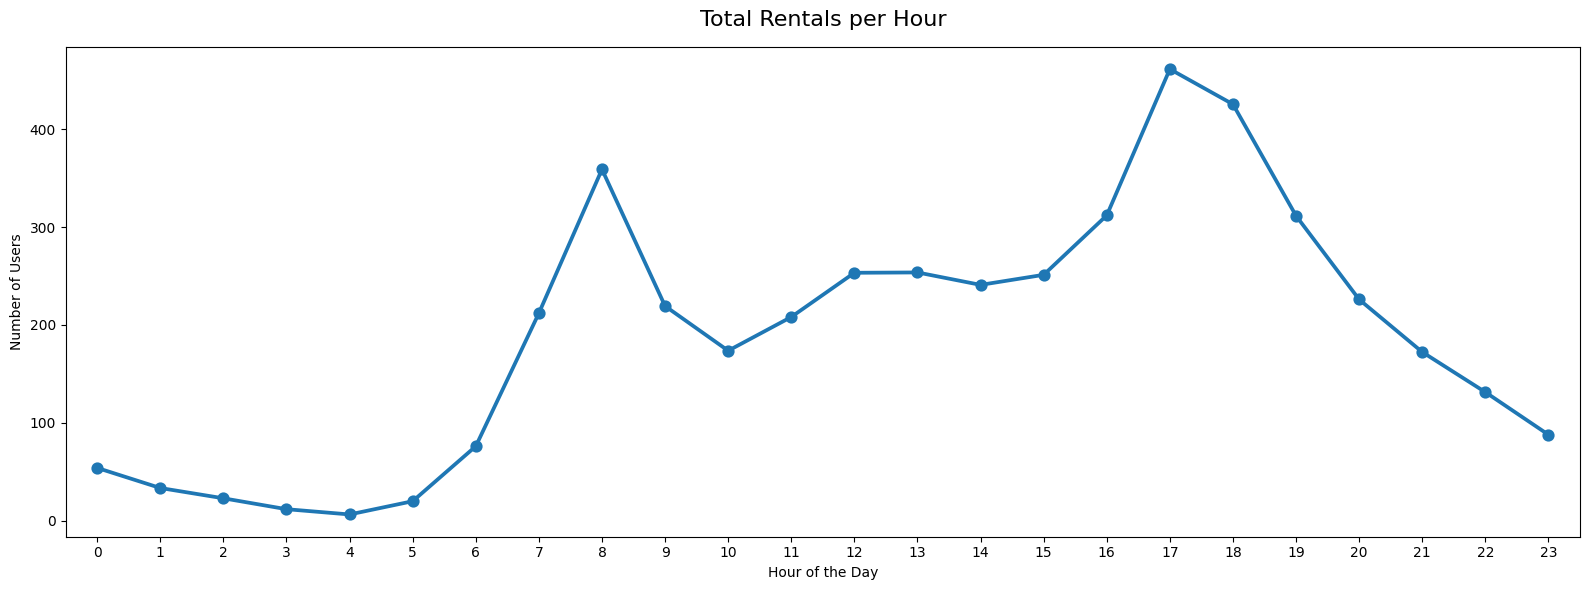

In [80]:
# Membuat figure untuk grafik
fig, ax = plt.subplots(figsize=(16,6))

# Plot data pengguna by hour
sns.pointplot(data=hour_df, x="hr", y="cnt", errorbar=None, ax=ax)

# Menambahkan judul, label sumbu, dan legend
ax.set_title('Total Rentals per Hour', fontsize=16, pad=15)
ax.set_xlabel("Hour of the Day")
ax.set_ylabel("Number of Users")

# Menampilkan grafik
plt.tight_layout()
plt.show()

**Insight:**
- Pola penyewaan terjadi tertinggi ketika musim fall dan saat cuaca sedang cerah dan mendukung untuk bersepeda karena saat hujan ringan tidak ada data penyewaan
- Sedangkan waktu terbanyak penyewaan adalah saat hari kerja dengan jam 8 bisa diasumsikan berangkat dan 17-18 bisa diasumsikan saat pulang

### Pertanyaan 3: Seberapa besar pengaruh kondisi cuaca (suhu, kelembapan, kecepatan angin) terhadap penyewaan sepeda?

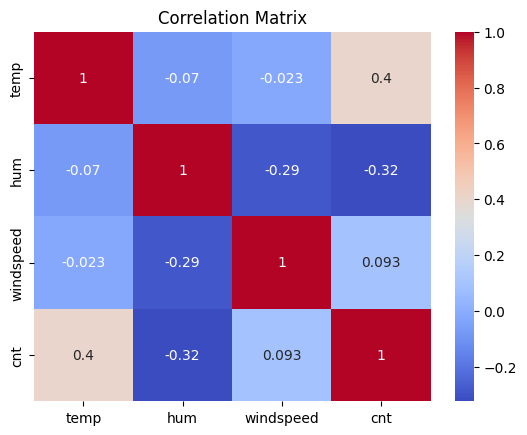

In [81]:
# Menampilkan grafikdari correlation-matric
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm')
plt.title('Correlation Matrix')
plt.show()

**Insight:**
- temp berpengaruh terhadap jumlah penyewaan sepeda

### Pertanyaan 4: Apakah ada tren peningkatan jumlah registered users dibandingkan dengan casual user selama periode tertentu?

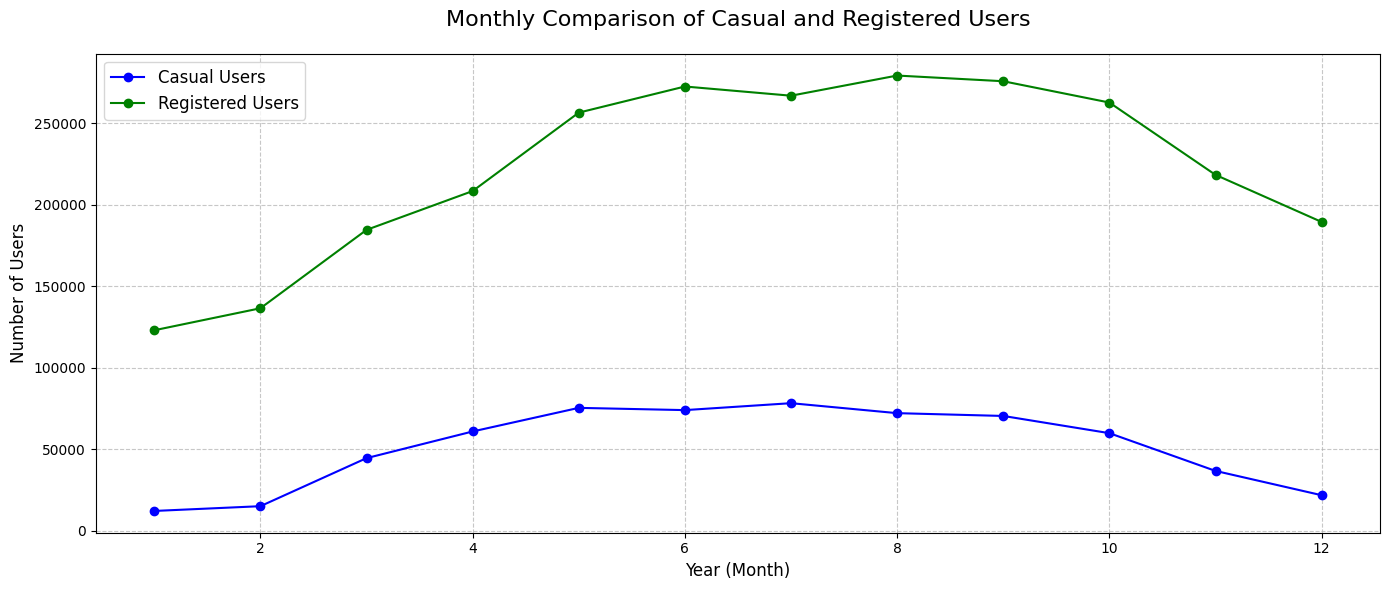

In [82]:
# Membuat figure grafik
plt.figure(figsize=(14, 6))

# Plot data untuk casual users
plt.plot( type_user_month_df.index, type_user_month_df["casual"], label="Casual Users", color="blue", marker="o", linestyle="-")

# Plot data untuk registered users
plt.plot( type_user_month_df.index, type_user_month_df["registered"], label="Registered Users", color="green", marker="o", linestyle="-")

# Menambahkan judul, label sumbu, dan legend
plt.title("Monthly Comparison of Casual and Registered Users", fontsize=16, pad=20)
plt.xlabel("Year (Month)", fontsize=12)
plt.ylabel("Number of Users", fontsize=12)
plt.legend(fontsize=12, loc='upper left')
plt.grid(True, linestyle='--', alpha=0.7)

# menampilkanf
plt.tight_layout()
plt.show()

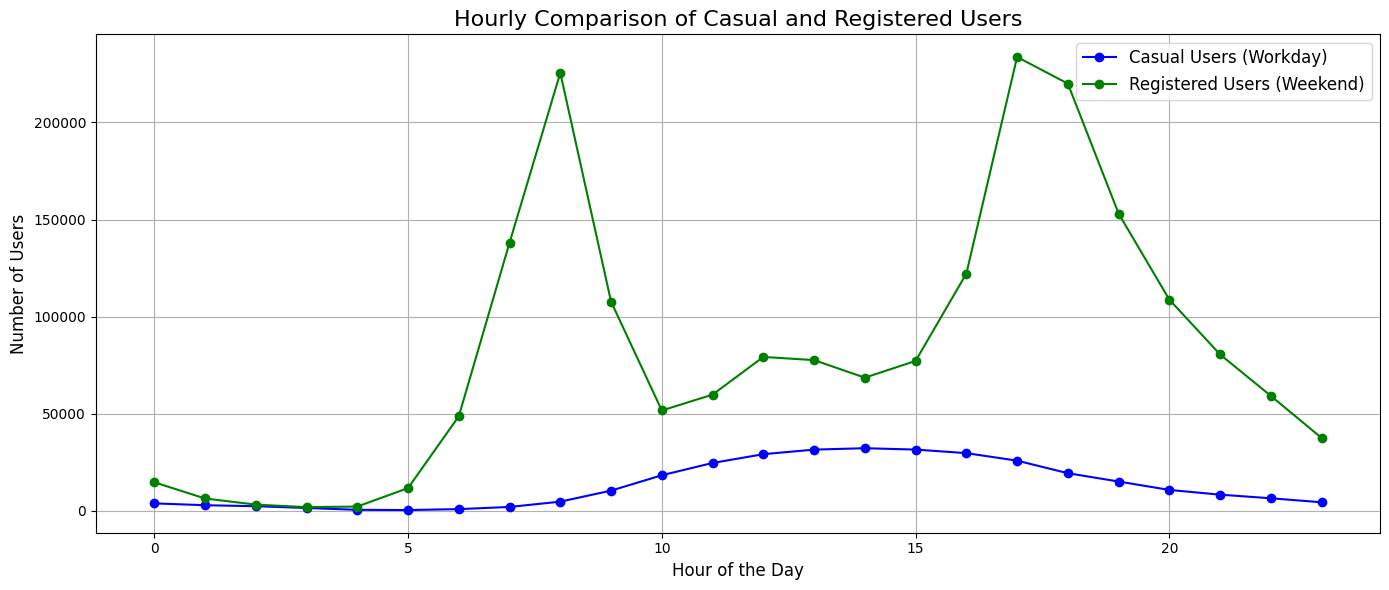

In [83]:
# Menghitung jumlah pengguna casual dan registered berdasarkan jam (hr) dan workingday
casual_users = hour_df[hour_df['workingday'] == 0].groupby('hr')['casual'].sum()
registered_users = hour_df[hour_df['workingday'] == 1].groupby('hr')['registered'].sum()

# Membuat figure untuk grafik
plt.figure(figsize=(14, 6))

# Plot data pengguna casual (workday)
plt.plot(casual_users.index, casual_users.values, label="Casual Users (Workday)", color="blue", marker="o", linestyle="-")

# Plot data pengguna registered (weekend)
plt.plot(registered_users.index, registered_users.values, label="Registered Users (Weekend)", color="green", marker="o", linestyle="-")

# Menambahkan judul, label sumbu, dan legend
plt.title("Hourly Comparison of Casual and Registered Users", fontsize=16)
plt.xlabel("Hour of the Day", fontsize=12)
plt.ylabel("Number of Users", fontsize=12)
plt.legend(fontsize=12)
plt.grid(True)

# Menampilkan grafik
plt.tight_layout()
plt.show()

**Insight:**
- Untuk monthly pola peningkatan antara casual user dan registered user hampir memiliki pola yang sama, namun ada perbedaan sedikit pada bulan 7 ketika casual user mengalami peningkatan disisi lain registered user mengalami penurunan
- Kemudian untuk pola hourly registered user memiliki pola peningkatan yang tinggi pada pagi hari dan sore hari

### Pertanyaan 5: Bagaimana pola penyewaan sepeda berdasarkan seberapa sering pengguna terdaftar melakukan penyewaan, waktu terakhir mereka menyewa, dan kontribusi nilai sewa?

#### RFM Anaalysis

In [84]:
# Mapping weekday nomor ke hari
weekday_map = {0: "Sunday", 1: "Monday", 2: "Tuesday", 3: "Wednesday", 
               4: "Thursday", 5: "Friday", 6: "Saturday"}
day_df["weekday_name"] = day_df["weekday"].replace(weekday_map)

# menghitung rfm
rfm_df = day_df.groupby("weekday_name").agg({
    "dteday": lambda x: (day_df["dteday"].max() - x.max()).days,  # Recency
    "cnt": ["count", "sum"]  # Frequency and Monetary
}).reset_index()

# Rename columns
rfm_df.columns = ["weekday", "recency", "frequency", "monetary"]

# Sort by weekday
weekday_order = ["Sunday", "Monday", "Tuesday", "Wednesday", "Thursday", "Friday", "Saturday"]
rfm_df["weekday"] = pd.Categorical(rfm_df["weekday"], categories=weekday_order, ordered=True)
rfm_df.sort_values(by="weekday", inplace=True)

# tampilkan rfm_df
rfm_df

,weekday,recency,frequency,monetary
3,Sunday,1,105,444027
1,Monday,0,105,455503
5,Tuesday,6,104,469109
6,Wednesday,5,104,473048
4,Thursday,4,104,485395
0,Friday,3,104,487790
2,Saturday,2,105,477807


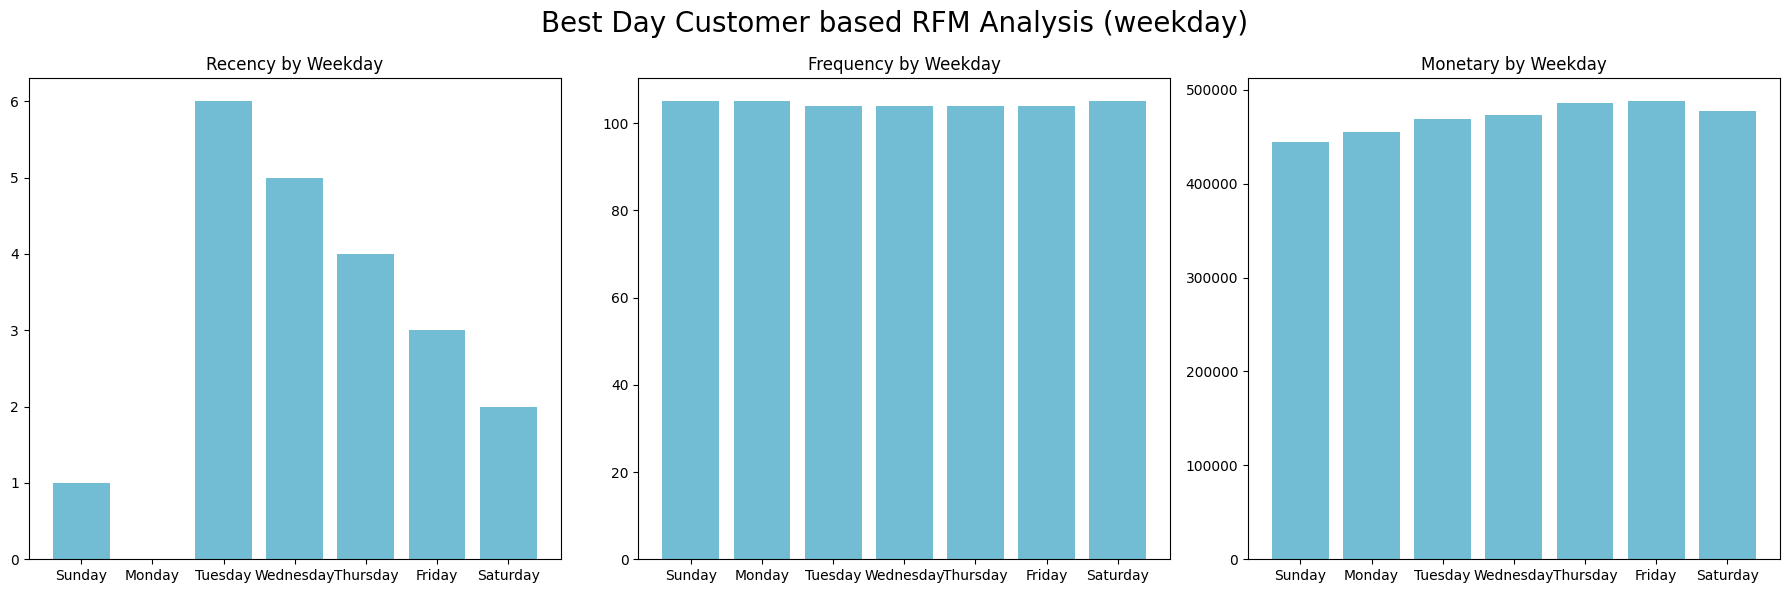

In [85]:
# membuat fig grafik
fig, ax = plt.subplots(1, 3, figsize=(18, 6), sharey=False)

# Color palette
colors = ["#72BCD4", "#72BCD4", "#72BCD4", "#72BCD4", "#72BCD4", "#72BCD4"]

# Recency Plot
ax[0].bar(rfm_df["weekday"], rfm_df["recency"], color=colors)
ax[0].set_title("Recency by Weekday")
ax[0].set_ylabel(None)
ax[0].set_xlabel(None)

# Frequency Plot
ax[1].bar(rfm_df["weekday"], rfm_df["frequency"], color=colors)
ax[1].set_title("Frequency by Weekday")
ax[1].set_ylabel(None)
ax[1].set_xlabel(None)

# Monetary Plot
ax[2].bar(rfm_df["weekday"], rfm_df["monetary"], color=colors)
ax[2].set_title("Monetary by Weekday")
ax[2].set_ylabel(None)
ax[2].set_xlabel(None)
plt.suptitle("Best Day Customer based RFM Analysis (weekday)", fontsize=20)

# atur layout dan menampilkan grafik
plt.tight_layout()
plt.show()

**Conclusion:**
- Pertanyaan 1: Penyewaan overall mengalami peningkatan dari tahun 2011 ke 2012, namun pada 2012 akhir penyewaan menalami penurunan walaupun pola ini serupa pada tahun sebelumnya namun harus menjadi perhatian agar bisa membuat strategi untuk meniningkatkan penyewaan sepeda pada akhir tahun
- Pertanyaan 2: Pola penyewaan tertinggi terjadi ketika musim fall dan saat cuaca sedang cerah dan mendukung untuk bersepeda karena saat hujan ringan tidak ada data penyewaan, sedangkan waktu terbanyak penyewaan adalah saat hari kerja dengan jam 8 bisa diasumsikan berangkat dan 17-18 bisa diasumsikan saat pulang aktivitas. Dengan adanya pola ini maka dapat memperluas penyewaan terhadap tempat-tempat yang berlokasi sekitar perusahaan ataupun sekolah dan kampus.
- Pertanyaan 3: parameter yang berpengaruh positif terhadap jumlah penyewaan sepeda adalah temperature, sedangkan humidity berkorelasi negatif yang artinya customerakan melakukan penyewaan sepeda ketika suhu dan kelembapan ideal untuk bersepeda.
- Pertanyaan 4: Untuk monthly pola peningkatan antara casual user dan registered user hampir memiliki pola yang sama, namun ada perbedaan sedikit pada bulan 7 ketika casual user mengalami peningkatan disisi lain registered user mengalami penurunan, kemudian untuk pola hourly registered user memiliki pola peningkatan yang tinggi pada pagi hari dan sore hari.
- Pertanyaan 5: recency terjadi pada hari selasa, sedangkan frequency memiliki pola yang hampir sama,dan monetary tertinggi pada Kamis dan Jumat

### Export Clean Dataset

In [86]:
day_df.to_csv("day_clean.csv", index=False)
hour_df.to_csv("hour_clean.csv", index=False)